# Bell Ungleichung

### 0. Imports

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

from qiskit.providers.basic_provider import BasicProvider
from qiskit.visualization import plot_histogram

from numpy import pi
import random
import numpy as np
import matplotlib.pyplot as plt

### 1. Erstes Experiment
- Zwei nicht-verschränkte und nicht-polarisierte Photonen werden auf zwei Filter geschickt.
- Die Photonen werden als zwei Qubits im Superpositionszustand dargestellt.
- Die Filter werden durch das Messen abgebildet.

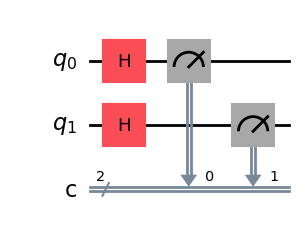

In [19]:
qreg = QuantumRegister(2, 'q')
creg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg, creg)

circuit.h(qreg[0])
circuit.h(qreg[1])
circuit.measure(qreg[0], creg[0])
circuit.measure(qreg[1], creg[1])
circuit.draw('mpl')

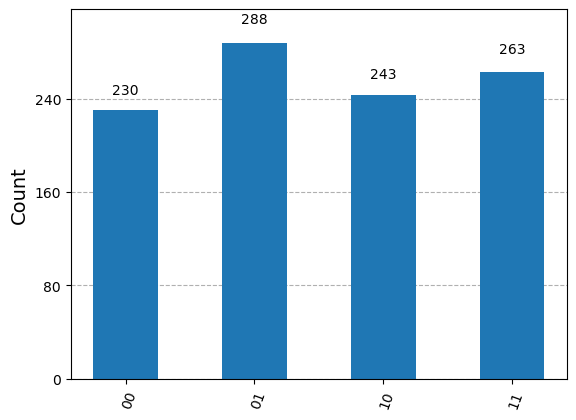

In [21]:
backend = BasicProvider().get_backend("basic_simulator")

result_sim = backend.run(circuit, shots=1024).result()
  
counts = result_sim.get_counts(circuit)

plot_histogram(counts)

- 00: Beide Photonen werden durchgelassen.
- 11: Beide Photonen werden absorbiert.
- 10: Das linke Photon wird absorbiert und das rechte Photon wird durchgelassen.
- 01: Das rechte Photon wird absorbiert und das linke Photon wird durchgelassen.

### 2. Zweites Experiment:
- Zwei verschränkte und nicht-polarisierte Photonen werden zeitgleich auf zwei Filter geschickt.
- Die Photonen werden als zwei Qubits im Superpositionszustand dargestellt. 
- Die Verschränkung wird durch ein CNOT-Gatter erzeugt.
- Die identischen Filter werden durch das Messen abgebildet.

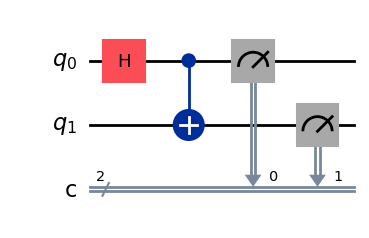

In [23]:
qreg = QuantumRegister(2, 'q')
creg = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg, creg)

circuit.h(qreg[0])
circuit.cx(qreg[0],qreg[1])
circuit.measure(qreg[0], creg[0])
circuit.measure(qreg[1], creg[1])
circuit.draw('mpl')

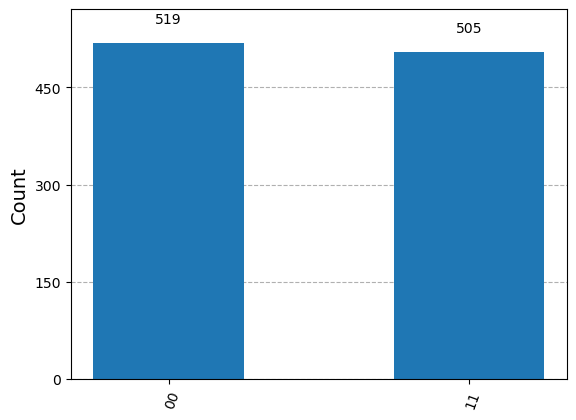

In [31]:
backend = BasicProvider().get_backend("basic_simulator")

result_sim = backend.run(circuit, shots=1024).result()
  
counts = result_sim.get_counts(circuit)

plot_histogram(counts)

- 00: Beide Photonen werden durchgelassen.
- 11: Beide Photonen werden absorbiert.

### 3. Drittes Experiment:
- Zwei verschränkte und nicht polarisierte Photonen werden auf zwei unterschiedliche Filter geschickt.
- Wobei das linke Photon zuerst gemessen wird. Die Rotation der beiden Filter wird dabei zufällig nach der Emission der Photonen festgelegt.
- Die Verschränkung wird durch ein CNOT-Gatter erzeugt.
- Das Rotieren der Filter wird mit einem RY-Gatter nach dem Verschränken erzeugt.
- Das Messen bildet den tatsächliche Filterwirkung ab.

#### Basisfunktionen für die Berechnung

In [33]:
# Funktion zum Zurückgeben von zwei zufälligen Alpha-Werten
def get_random_alphas():
    alpha_values_left = [0, np.pi * 1/3]
    alpha_values_right = [np.pi * 1/3, np.pi * 2/3]

    left = random.choice(alpha_values_left)
    if left in alpha_values_right:
        alpha_values_right.remove(left)
    right = random.choice(alpha_values_right)
    
    return left, right

# Funktion zur Erstellung eines Bell-Zustandes mit verschiedenen Filtern
def create_bell_circuit(alpha_left, alpha_right):
    qreg = QuantumRegister(2, 'q')
    creg = ClassicalRegister(2, 'c')
    circuit = QuantumCircuit(2, 2)
    circuit.h(qreg[0])
    circuit.cx(qreg[0],qreg[1])
    circuit.ry(alpha_left, qreg[0])
    circuit.ry(alpha_right, qreg[1])
    circuit.measure(qreg[0], creg[0])
    circuit.measure(qreg[1], creg[1])
    return circuit

#### Circuit das in der folgenden Schleife immer wieder erzeugt wird

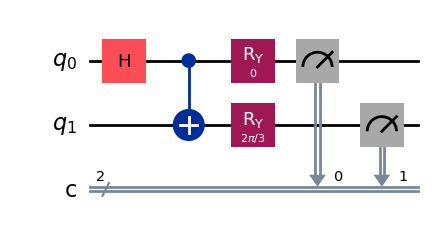

In [69]:
alpha_left, alpha_right = get_random_alphas()
qc = create_bell_circuit(alpha_left, alpha_right)
qc.draw('mpl')

#### Auswertung eines einzelnen Zustandes
Bei jeder neuen Messung ist der Zustand eigentlich neu zu erzeugen, anstatt denselben Zustand wie hier mehrfach zu messen.

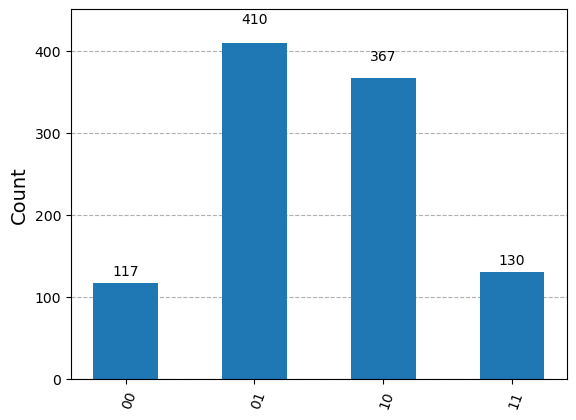

In [71]:
backend = BasicProvider().get_backend("basic_simulator")

result_sim = backend.run(qc, shots=1024).result()
  
counts = result_sim.get_counts(qc)

plot_histogram(counts)

#### Statistische Auswertung für das Experiment aus der Bell-Ungleichung

!!! Kann eine Weile dauern !!!

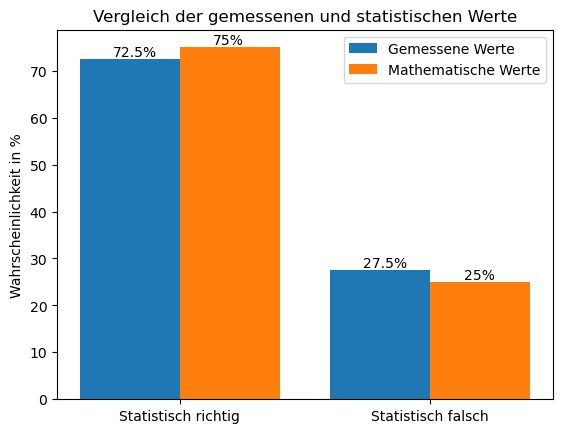

In [73]:
shots = 1040 #Anzahl der Shots
values_in_75_probability = 0 #Anzahl der richtigen Messungen
values_in_25_probability = 0 #Anzahl der falschen Messungen
true_value_75 = 75 #Anteil der statistisch richtigen Messungen (Mathematisch)
true_value_25 = 25 #Anteil der statistisch falschen Messungen (Mathematisch)

#Die Schleife simmuliert die Messung mit einer ständig anderen Filterkombination
for _ in range(shots):
    #Erstellung des Circuits
    alpha_left, alpha_right = get_random_alphas()
    qc = create_bell_circuit(alpha_left, alpha_right)
    qc.draw('mpl')

    #Simulation des Circuits
    backend = BasicProvider().get_backend("basic_simulator")
    result_sim = backend.run(qc, shots=1).result()
    counts = result_sim.get_counts(qc)

    #Da der eine Fall konträr ist, muss dieser anders gezählt werden
    if alpha_left == 0 and alpha_right == np.pi * 2/3:
        if {'01', '10'}.intersection(counts):
            values_in_75_probability += 1
        else:
            values_in_25_probability += 1
    else: 
        if {'00', '11'}.intersection(counts):
            values_in_75_probability += 1
        else:
            values_in_25_probability += 1

# Umrechnung in prozentuale Anteile
values_in_75_probability = round(float((values_in_75_probability/shots)*100),2)
values_in_25_probability = round(float((values_in_25_probability/shots)*100),2)

# Labels und Werte für das Histogramm
labels = ['Statistisch richtig', 'Statistisch falsch']
values = [values_in_75_probability, values_in_25_probability]
true_values = [true_value_75, true_value_25]

# Erstellen des Histogramms
x = range(len(labels))

# Balkendiagramm zeichnen
fig, ax = plt.subplots()
bars1 = ax.bar(x, values, width=0.4, label='Gemessene Werte', align='center')
bars2 = ax.bar([p + 0.4 for p in x], true_values, width=0.4, label='Mathematische Werte', align='center')

# Werte auf die Balken schreiben
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/3, yval, f'{(yval)}%', va='bottom') 

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/3, yval, f'{(yval)}%', va='bottom')

# Achsen und Titel setzen
ax.set_ylabel('Wahrscheinlichkeit in %')
ax.set_title('Vergleich der gemessenen und statistischen Werte')
ax.set_xticks([p + 0.2 for p in x])
ax.set_xticklabels(labels)
ax.legend()

# Diagramm anzeigen
plt.show()
